<a href="https://colab.research.google.com/github/aradhyasharma25/Breast-Cancer-Prediction/blob/main/breast_cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **IMPORTING** **LIBRARIES**

In [163]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RepeatedKFold
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from statistics import mean
%matplotlib inline

# **IMPORTING** **DATA**

In [164]:
data= pd.DataFrame(pd.read_csv("/content/data.csv"))

# **DATA** **PRE-PROCESSING**

PRINTING TOP 5 ROWS OF THE TABLE

In [165]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


COLUMN NAMES IN THE DATA

In [166]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

ID - ID number

DIAGNOSIS - The diagnosis of breast tissues (M = malignant, B = benign)

radius_mean - mean of distances from center to points on the perimeter

texture_mean - standard deviation of gray-scale values

perimeter_mean - mean size of the core tumor

area_mean

smoothness_mean - mean of local variation in radius lengths

compactness_mean - mean of perimeter^2 / area - 1.0

concavity_mean - mean of severity of concave portions of the contour

concave points_mean - mean for number of concave portions of the contour

symmetry_mean

fractal_dimension_mean - mean for "coastline approximation" - 1

radius_se - standard error for the mean of distances from center to points on the perimeter

texture_se - standard error for standard deviation of gray-scale values

perimeter_se

area_se

smoothness_se - standard error for local variation in radius lengths

compactness_se - standard error for perimeter^2 / area - 1.0

concavity_se - standard error for severity of concave portions of the contour

concave points_se - standard error for number of concave portions of the contour

symmetry_se

fractal_dimension_se - standard error for "coastline approximation" - 1

radius_worst - "worst" or largest mean value for mean of distances from center to points on the perimeter

texture_worst - "worst" or largest mean value for standard deviation of gray-scale values

perimeter_worst

area_worst

smoothness_worst - "worst" or largest mean value for local variation in radius lengths

compactness_worst - "worst" or largest mean value for perimeter^2 / area - 1.0

concavity_worst - "worst" or largest mean value for severity of concave portions of the contour

concave points_worst - "worst" or largest mean value for number of concave portions of the contour

symmetry_worst

fractal_dimension_worst - "worst" or largest mean value for "coastline approximation" - 1

The mean, standard error and "worst" or largest which is actually the mean of the three largest values of these features were computed for each image, resulting in 30 features.

NO. OF UNIQUE VALUES IN EACH COLUMN

In [167]:
for i in data.columns:
  print(i,"\n",data[i].nunique())

id 
 569
diagnosis 
 2
radius_mean 
 456
texture_mean 
 479
perimeter_mean 
 522
area_mean 
 539
smoothness_mean 
 474
compactness_mean 
 537
concavity_mean 
 537
concave points_mean 
 542
symmetry_mean 
 432
fractal_dimension_mean 
 499
radius_se 
 540
texture_se 
 519
perimeter_se 
 533
area_se 
 528
smoothness_se 
 547
compactness_se 
 541
concavity_se 
 533
concave points_se 
 507
symmetry_se 
 498
fractal_dimension_se 
 545
radius_worst 
 457
texture_worst 
 511
perimeter_worst 
 514
area_worst 
 544
smoothness_worst 
 411
compactness_worst 
 529
concavity_worst 
 539
concave points_worst 
 492
symmetry_worst 
 500
fractal_dimension_worst 
 535
Unnamed: 32 
 0


INFORMATION ON THE DATA TYPE AND NON-NULL VALUES OF EACH OF THE FEATURE VARIABLE  PRESENT IN THE DATA

In [168]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

5 POINT DESCRIPTIVE STATISTICS

In [169]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


CHECKING FOR NULL VALUES

In [170]:
data.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

SHAPE OF THE DATA BEFORE REMOVING ANY UNNECESSARY COLUMN

In [171]:
data.shape

(569, 33)

DROPPING UNNECESSARY COLUMNS

In [172]:
data.drop(["id","Unnamed: 32"], inplace=True, axis=1)

SHAPE OF DATA AFTER DROPPING COLUMNS

In [173]:
data.shape

(569, 31)

CHECKING FOR ANY DUPLICATE ROWS

In [174]:
print("Number of duplicate rows: ", sum(data.duplicated()))

Number of duplicate rows:  0


# **DATA VISUALIZATION & EDA**



COUNTING THE TOTAL NO. OF BENIGN AND MALIGNANT LABELS IN THE DATA

In [175]:
value_count= data["diagnosis"].value_counts()

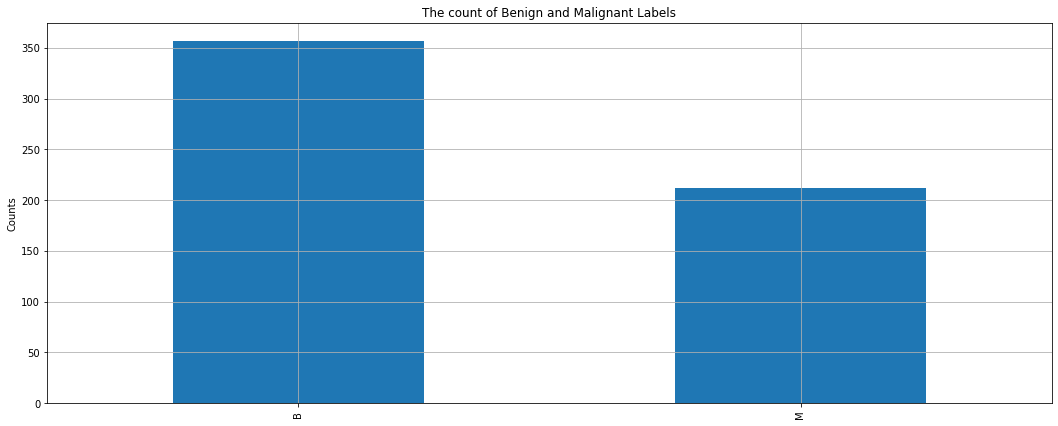

In [176]:
plt.figure(figsize = (18, 7))
value_count.plot(kind = "bar")
plt.ylabel("Counts")
plt.title("The count of Benign and Malignant Labels")
plt.grid(True)
plt.show() 

From the above graph, we can infer that the total number of Malignant Labels is less that the total number of Benign Labels. In other words, we have more data to train Benign Labels than to train Malignant Label. This type of data is known as Unbalanced Data. Here, the difference between the toal of no. of observations of two types of Cancer is not so significant so we'll proceed further with the original data itslef.

PLOTTING PIE CHART FOR THE DATA

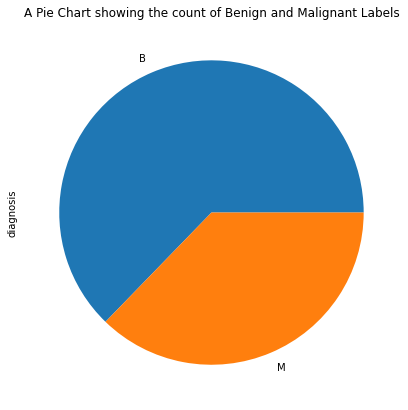

In [177]:
value_count.plot(kind = "pie", figsize=(18, 7))
plt.title("A Pie Chart showing the count of Benign and Malignant Labels")
plt.show() 

PRINTING THE NUMBER OF COUNTS FOR THE VALUES OF THE LABELS IN THE DIAGNOSIS COLUMN

In [178]:
B, M = value_count 
print("Number of Benign: {}".format(B))
print("Number of Malignant: {}".format(M))

Number of Benign: 357
Number of Malignant: 212


VIOLIN PLOT FOR FIRST 10 FEATURES

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until


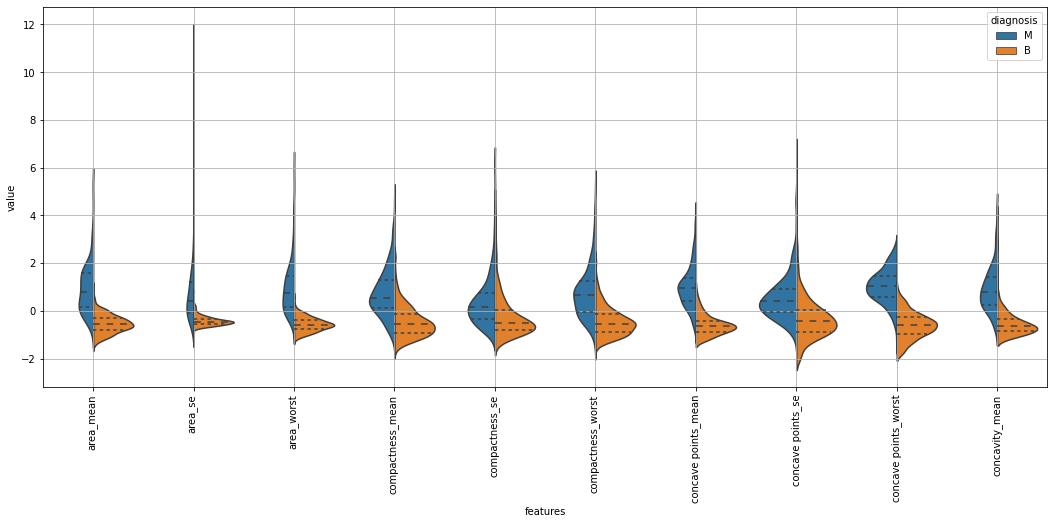

In [179]:
labels = data["diagnosis"]
input_features = data.iloc[1:,]
dataN2 = (input_features - input_features.mean()) / (input_features.std())
input_features = pd.concat([labels, dataN2.iloc[:, 0:10]], axis = 1)
data1 = pd.melt(input_features, id_vars = "diagnosis", var_name = "features", value_name = "value")

plt.figure(figsize = (18, 7))
sns.violinplot(x = "features", y = "value", hue = "diagnosis", data = data1, split = True, inner = "quart")
plt.xticks(rotation = 90)
plt.grid(True)
plt.show() 

Violin Plot is used to visualise the distribution of numerical data. It is a hybrid of box plot and kernel density plot, which shows peaks in the data. 

Here, we are comparing distribution of first 10 features for labels - benign and malignant. Violin plot was preferred over KDE plot as it is easy to interpret when comparing distribution of various features at the same time. As you can see, we can easily see how the first 10 features are distributed amongst two classes (benign and malignant).

Also, we see that most of the features are negatively skewed for benign label. That is, the data is more concentrated on the right part of the mean than it is to its left part. And, Mean < Median < Mode for the benign label.

WHile for the malignant label, we see that the features are positively skewed. The data is more concentrated on left part of the mean than it is on its right part. For positively skewed data, Mean > Median > Mode. 

The data is more spread out for malignant cancer than it is for benign cancer.

VIOLIN PLOT FOR NEXT 18 FEATURES

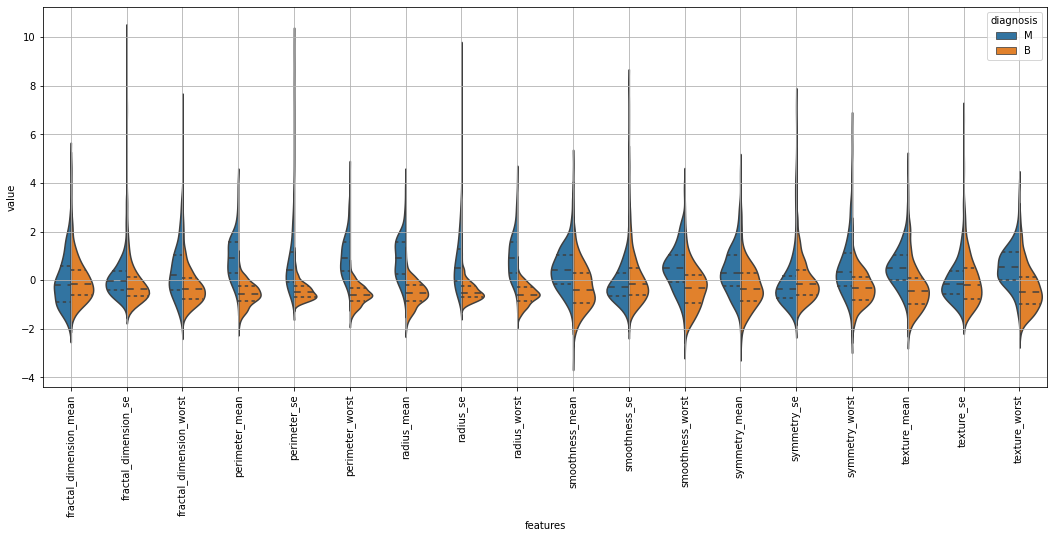

In [180]:
input_features = pd.concat([labels, dataN2.iloc[:, 13:]], axis = 1)
data1 = pd.melt(input_features, id_vars = "diagnosis", var_name = "features", value_name = "value")

plt.figure(figsize = (18, 7))
sns.violinplot(x = "features", y = "value", hue = "diagnosis", data = data1, split = True, inner = "quart")
plt.xticks(rotation = 90)
plt.grid(True)
plt.show() 

For the next 18 features also the observations are the same. That is, the features are negatively skewed in nature for benign cancer and positively skewed for malignant cancer.

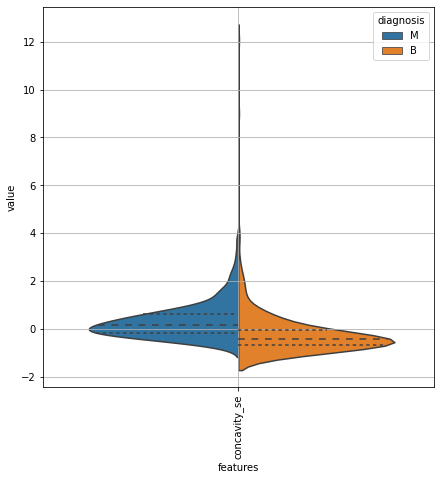

In [181]:
input_features = pd.concat([labels, dataN2.iloc[:, 10:11]], axis = 1)
data1 = pd.melt(input_features, id_vars = "diagnosis", var_name = "features", value_name = "value")

plt.figure(figsize = (7, 7))
sns.violinplot(x = "features", y = "value", hue = "diagnosis", data = data1, split = True, inner = "quart")
plt.xticks(rotation = 90)
plt.grid(True)
plt.show() 

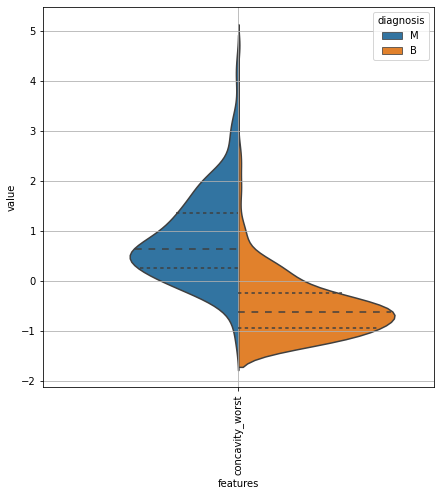

In [182]:
input_features = pd.concat([labels, dataN2.iloc[:, 11:12]], axis = 1)
data1 = pd.melt(input_features, id_vars = "diagnosis", var_name = "features", value_name = "value")

plt.figure(figsize = (7, 7))
sns.violinplot(x = "features", y = "value", hue = "diagnosis", data = data1, split = True, inner = "quart")
plt.xticks(rotation = 90)
plt.grid(True)
plt.show() 

AS WE CAN SEE THAT THE DATA CONTAINS VARIABLES LIKE RADIUS_MEAN, RADIUS_SE AND RADIUS_WORST. THESE VARIABLES ARE NOTHING BUT DERIVED VARIABLES FROM RADIUS. SO **SEPARATING FEATURES** INTO THEIR MEAN, SE AND WORST.

In [183]:
df_mean = data[(['radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean','compactness_mean','concavity_mean','concave points_mean','symmetry_mean','fractal_dimension_mean'])]
df_se = data[(['radius_se','texture_se','perimeter_se','area_se','smoothness_se','compactness_se','concavity_se','concave points_se','symmetry_se','fractal_dimension_se'])]
df_worst = data[(['radius_worst','texture_worst','perimeter_worst','area_worst','smoothness_worst','compactness_worst','concavity_worst','concave points_worst','symmetry_worst','fractal_dimension_worst'])]

PLOTTING KERNEL DENSITY PLOT FOR MEAN FEATURES ,I.E., RADIUS_MEAN, TEXTURE_MEAN ETC.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  after removing the cwd from sys.path.


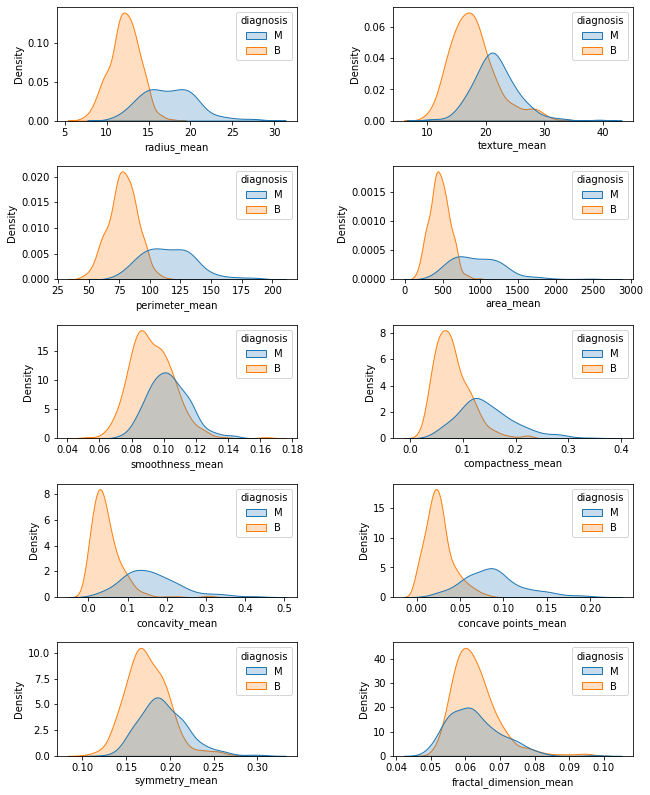

In [184]:
fig = plt.figure(figsize=(10, 13), constrained_layout=True)
for i in range(len(df_mean.columns)):
    plt.subplot(5, 2, i+1)
    plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4) #so that the graphs dont overlap with each other
    sns.kdeplot(data=df_mean, x=df_mean[df_mean.columns[i]], hue=data['diagnosis'], shade=True)

From the plots above, we can see that the distribution of benign cancer is more pronounced than the distribution of malignant cancer for most of the "mean" features. The curve of benign cancer is peaked while the curve of malignant cancer is more flatten than the benign cancer. In other words, variance of "mean" feature is more in the malignant cancer than it is for benign cancer.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  after removing the cwd from sys.path.


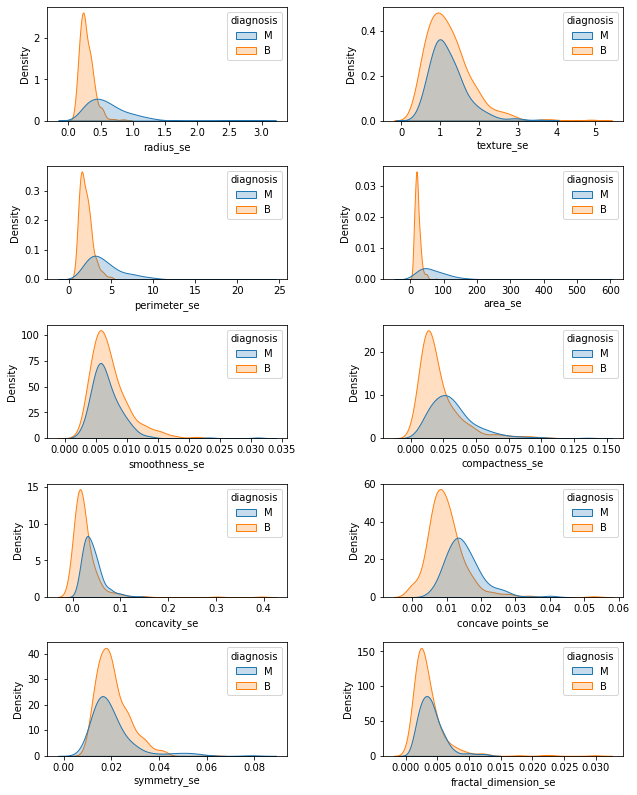

In [185]:
fig = plt.figure(figsize=(10, 13), constrained_layout=True)
for i in range(len(df_se.columns)):
    plt.subplot(5, 2, i+1)
    plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)
    sns.kdeplot(data=df_se, x=df_se[df_se.columns[i]], hue=data['diagnosis'], shade=True)

The "SE" features have similar behaviour for malignant and benign cancer except for perimeter, radius and area. Variance of perimeter, radius and area features is more for malignant than it is for benign.
Still the curve for benign cancer is more pronounced than malignant cancer.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  after removing the cwd from sys.path.


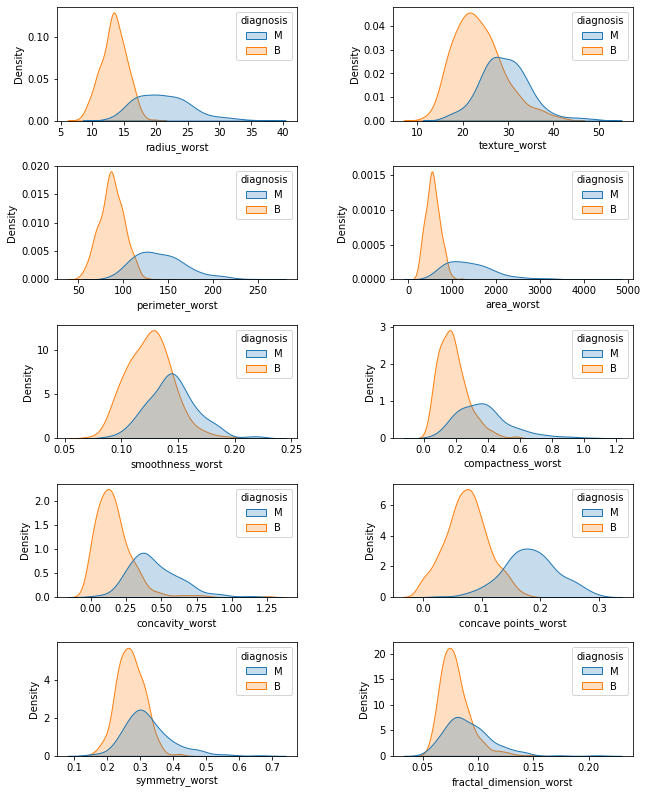

In [186]:
fig = plt.figure(figsize=(10, 13), constrained_layout=True)
for i in range(len(df_worst.columns)):
    plt.subplot(5, 2, i+1)
    plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)
    sns.kdeplot(data=df_worst, x=df_worst[df_worst.columns[i]], hue=data['diagnosis'], shade=True)

The curve of "worst" features is more peaked for benign cancer than it is for malignant. Variance of "worst" features for malignant cancer is more than the variance of the same features for benign cancer.

**CORRELATION MAP**

Text(0.5, 1.05, 'Correlation of All Features')

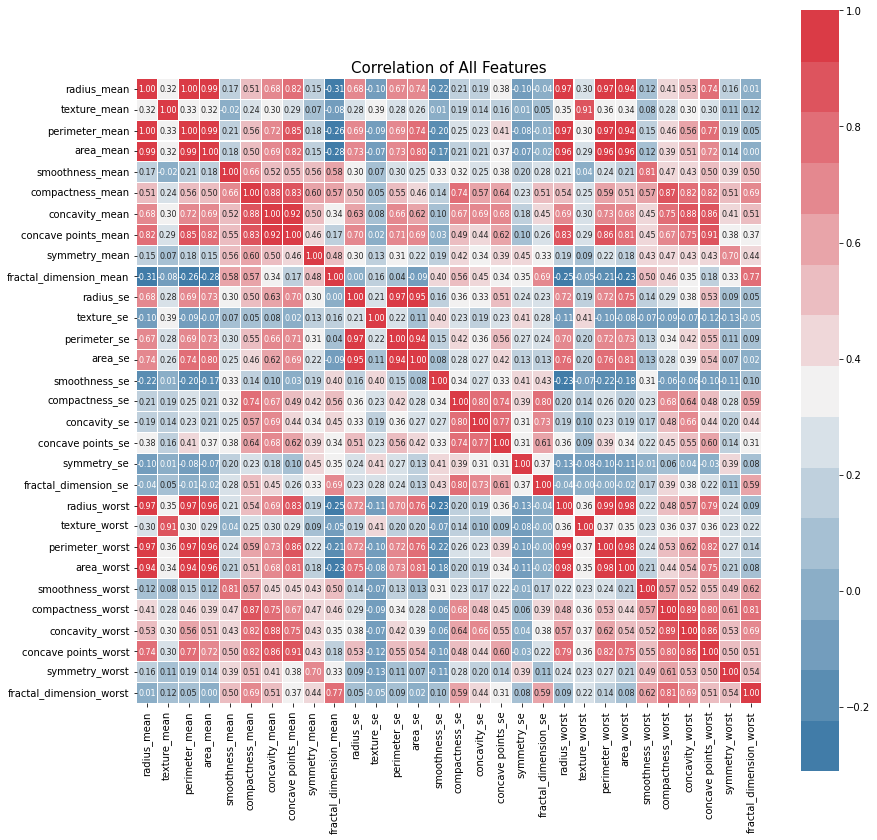

In [187]:
corr = data.iloc[:,1:].corr()
colormap = sns.diverging_palette(240, 10, n=15)
plt.figure(figsize=(14,14))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f', annot_kws={'size': 8}, cmap = colormap, linewidths=0.1, linecolor='white')
plt.title('Correlation of All Features', y=1.05, size=15)

COMPARING "AREA_MEAN" AND "AREA_WORST" FOR BENIGN AND MALIGNANT CANCER TYPE.

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


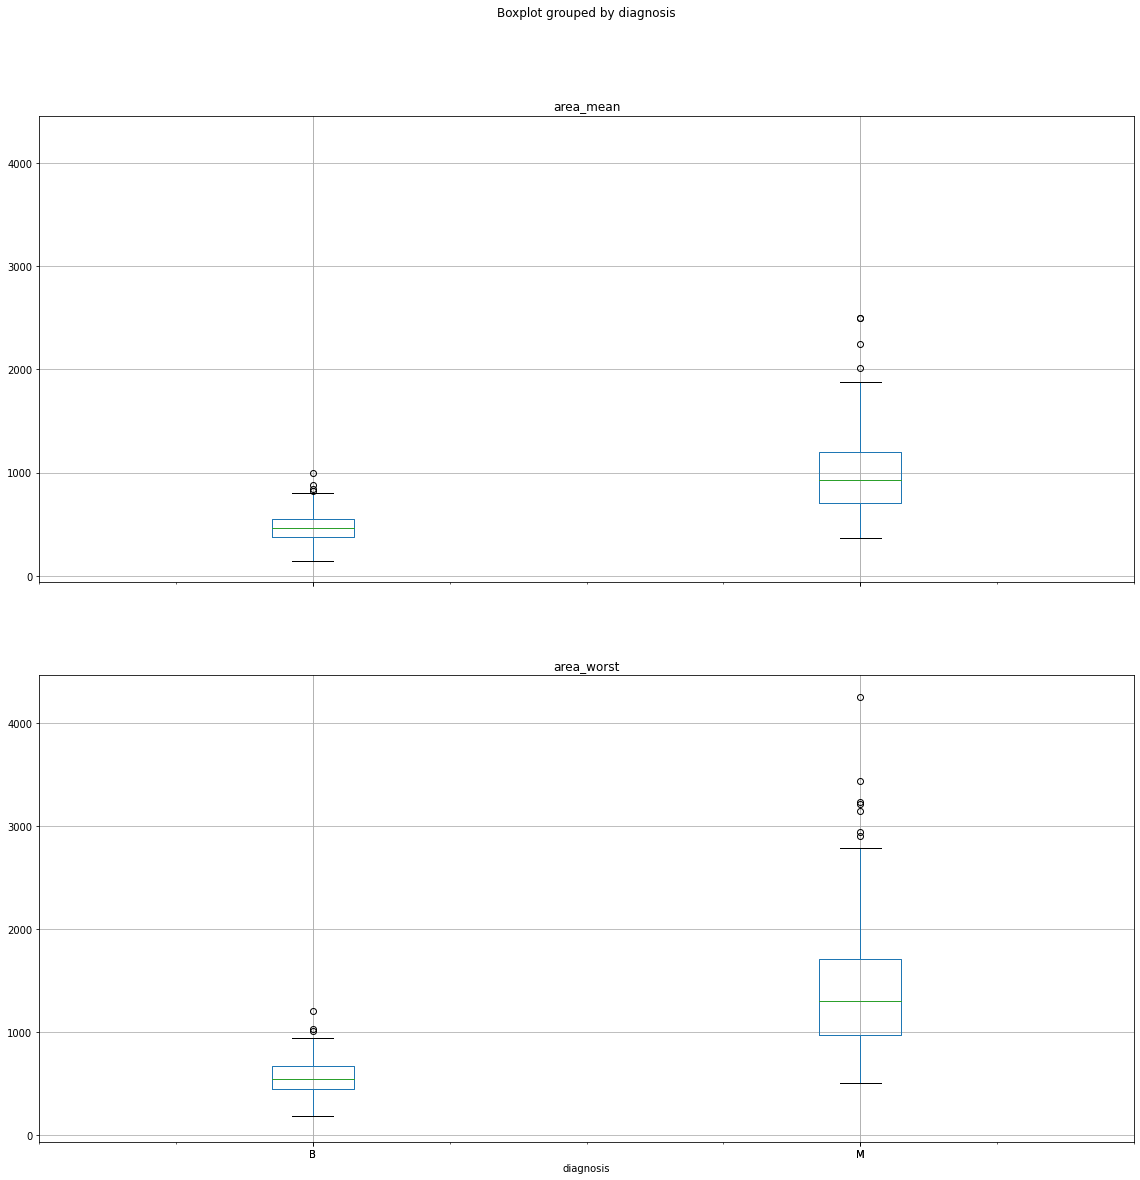

In [188]:
boxplot = data.boxplot(column = ["area_mean", "area_worst"], by="diagnosis", layout = (2, 1), figsize=(19, 19))
plt.show() 

From the box plot we see that the both the predictor variables "area_worst" and "area_mean" are higher for malignant than benign.

SCATTER PLOT FOR "AREA_MEAN", "AREA_WORST" AND "RADIUS_MEAN"

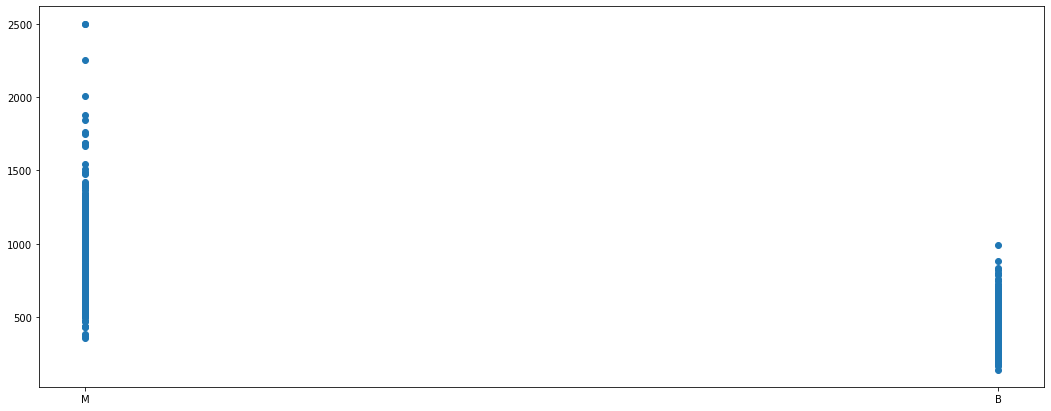

In [189]:
plt.figure(figsize=(18, 7))
plt.scatter(data['diagnosis'], data['area_mean'])
plt.show()

Again, we see that "area_mean" is more spread for malignant than benign cancer. Area of the benign cancer is generally small in the breast mass. But we can not categorize a mass as "benign" just because of its small area as there is a high chance that it is malignant cancer in its initial stages. That is, breast mass with malignant cancer can sometimes have an area lying in the range of benign cancer. Consequently, there is high probability of predicting a malignant cancer as benign.

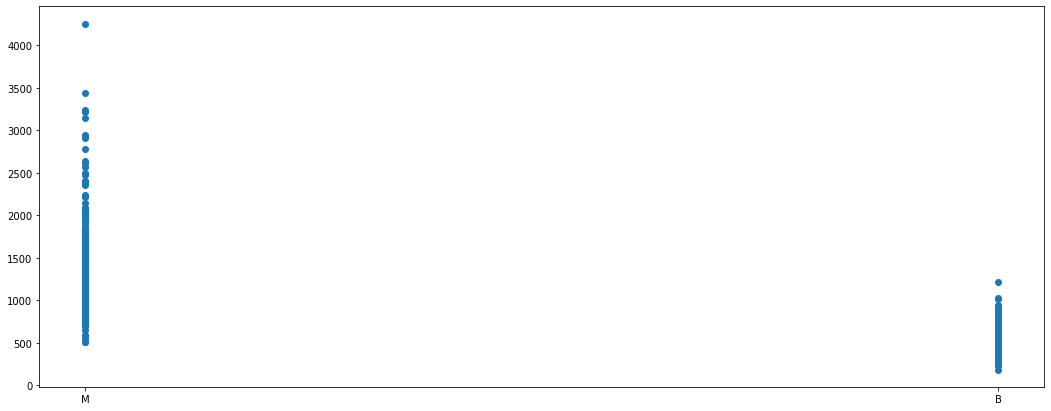

In [190]:
plt.figure(figsize=(18, 7))
plt.scatter(data['diagnosis'], data['area_worst'])
plt.show() 

Interpretation same as "area_mean"

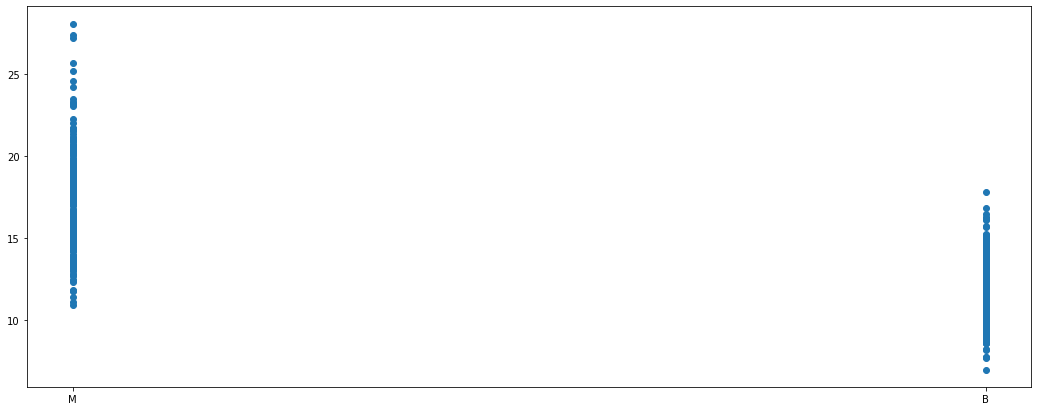

In [191]:
plt.figure(figsize=(18, 7))
plt.scatter(data['diagnosis'], data['radius_mean'])
plt.show() 

Interpretation same as "area_mean"

PAIRPLOT OF PREDICTOR VARIABLES

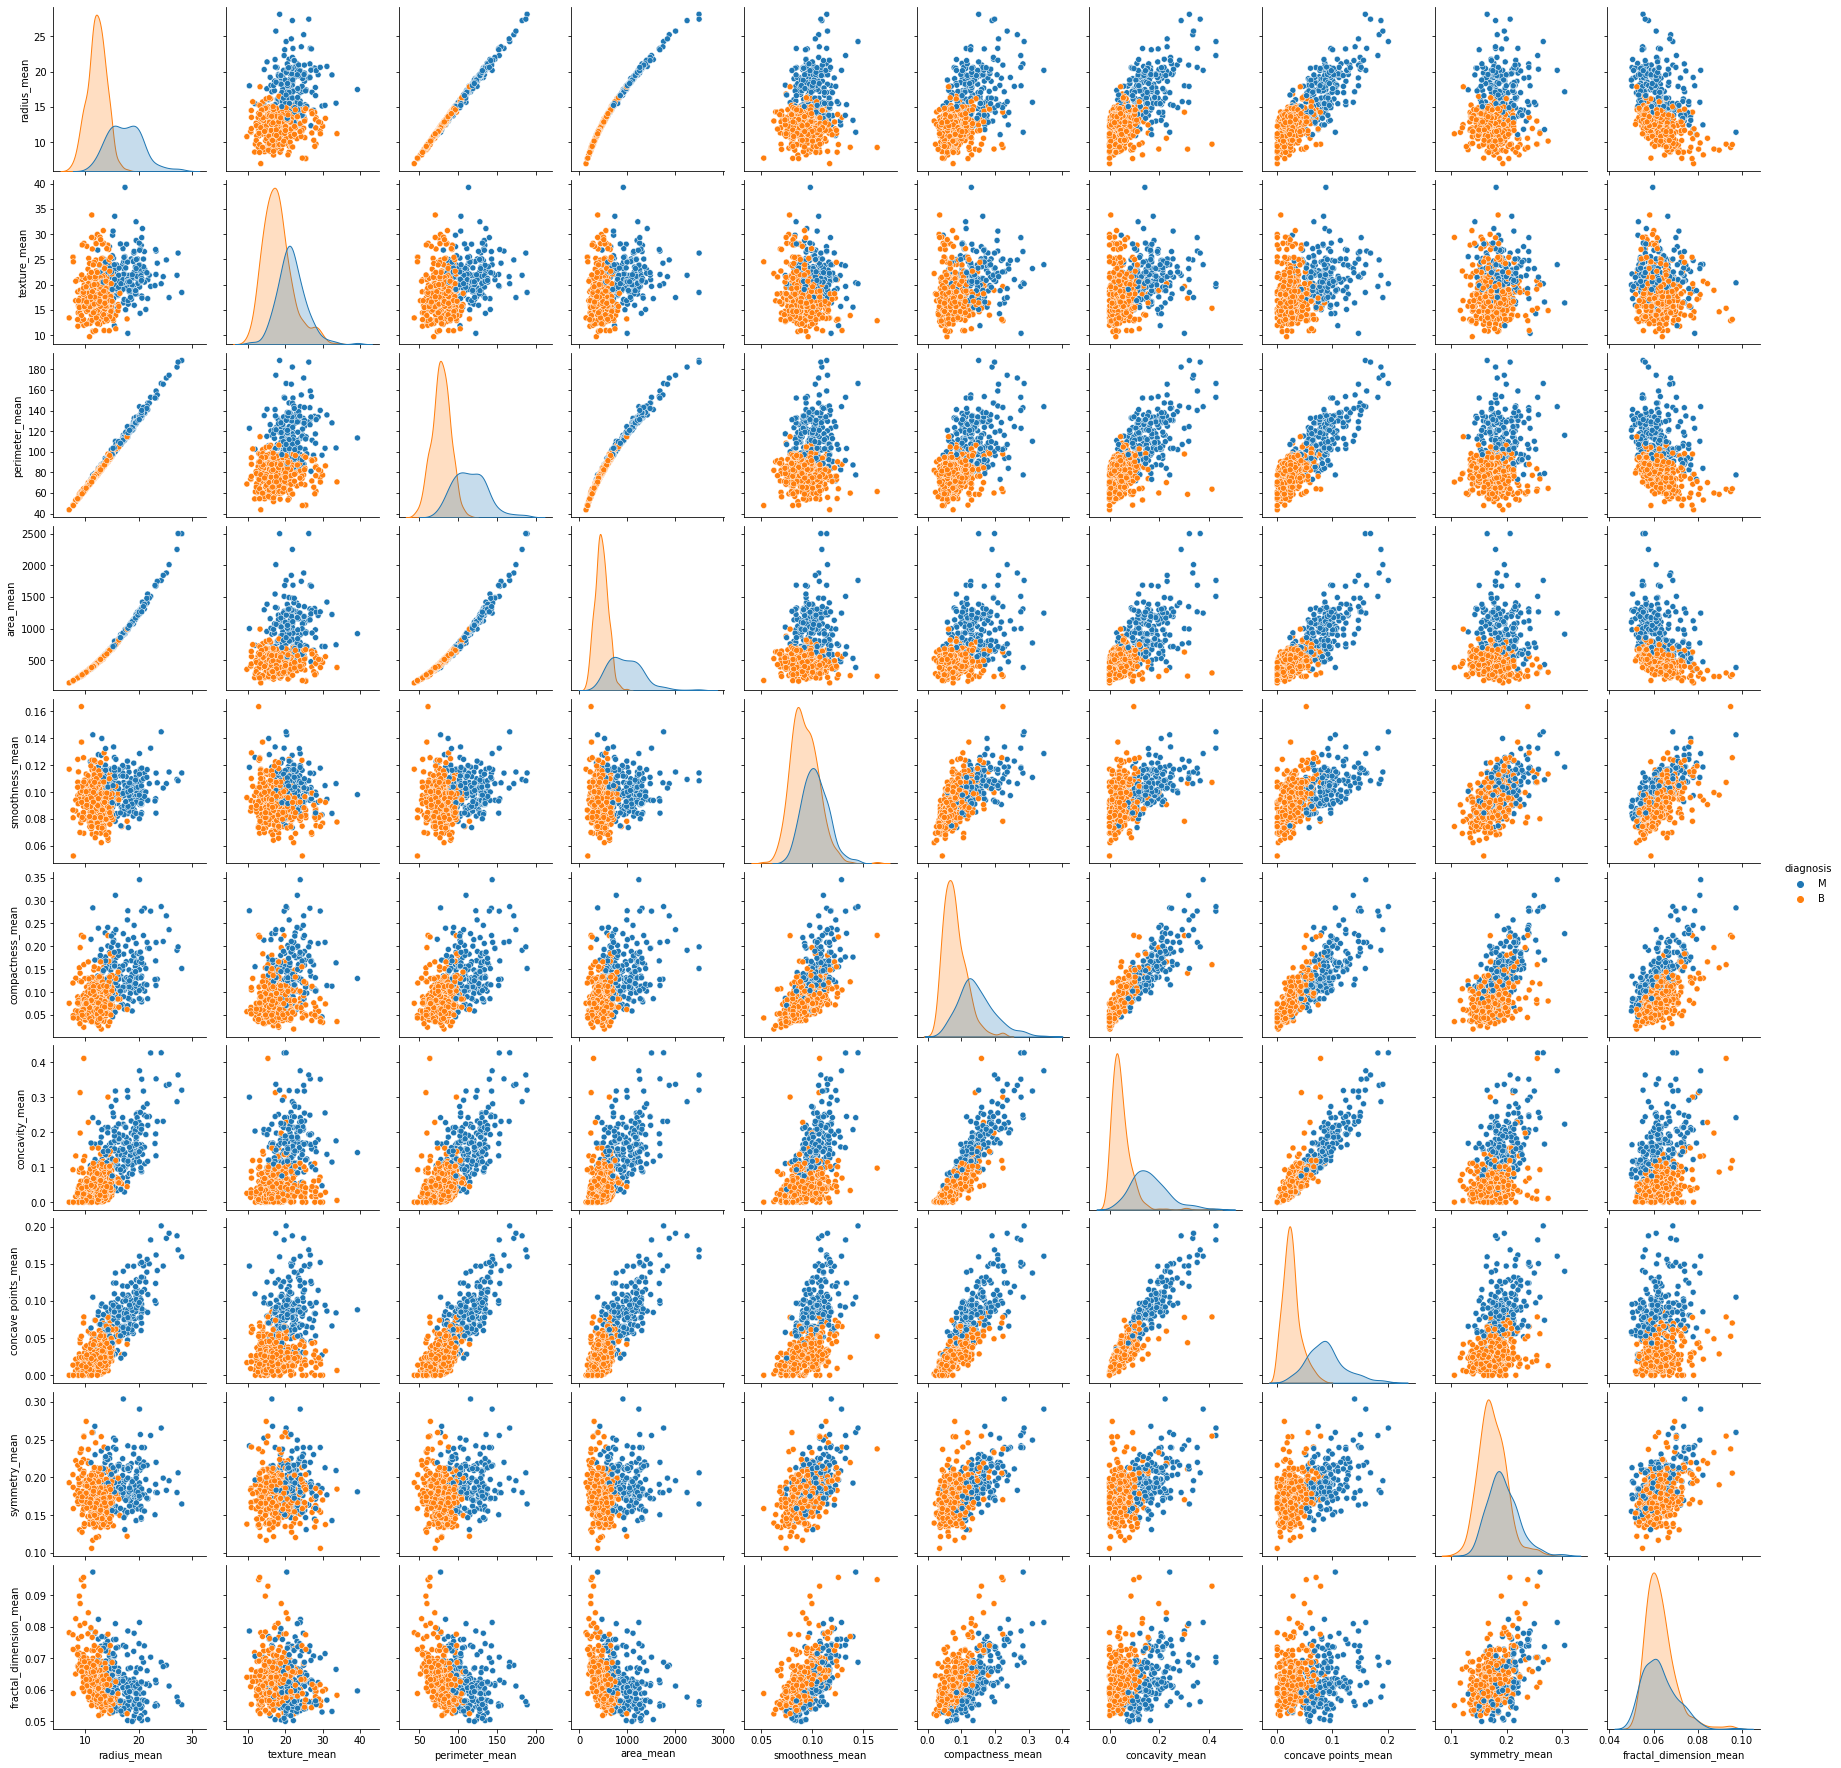

In [192]:
sns.pairplot(data[['diagnosis','radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean','compactness_mean','concavity_mean','concave points_mean','symmetry_mean','fractal_dimension_mean']],hue = "diagnosis")
plt.show()

We see that the malignant cancer has higher values of predictor variables as compared to benign cancer.

ENCODING RESPONSE VARIABLE

In [193]:
labelencoder = LabelEncoder()
data.iloc[:,0] = labelencoder.fit_transform(data.iloc[:,0].values)

In [194]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


SEPARATING PREDICTOR VARIABLES FROM RESPONSE VARIABLE 

In [195]:
X = data.iloc[:,1].values
Y = data.iloc[:,0].values

SPLITTING TRAINING AND TESTING DATASET

In [196]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25)

STANDARDISING THE PREDICTOR VARIABLES (SO THAT ALL THE FEATURE ON THE SAME SCALE AND THE PREDICTED RESPONSE MAKES SENSE)

In [197]:
Standardisation = StandardScaler()
x_train = X_train.reshape(-1, 1)
x_test = X_test.reshape(-1,1)
X_train_scaled = Standardisation.fit_transform(x_train)
X_test_scaled = Standardisation.fit_transform(x_test)
dataS= Standardisation.fit_transform(data)

#**FEATURE EXTRACTION**

PRINICPAL COMPONENT ANALYSIS IS PREFERRED AS IT COMBINES ALL THE FEATURES AND GIVES US THE COMBINATION WHICH EXPLAINS MOST OF THE VARIANCE IN THE DATASET. THIS DECREASES THE DIMENSIONALITY OF DATA FROM N-DIMENSIONAL TO n-DIMENSIONAL, WHERE n IS THE MINIMUM NUMBER OF PCA COMPONENTS WHICH EXPLAINS MOST OF THE VARIANCE IN THE DATA. 

In [198]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
principalComponents = pca.fit_transform(data)
principalDf = pd.DataFrame(data = principalComponents, columns = ['pca1','pca2','pca3','pca4','pca5','pca6','pca7','pca8','pca9','pca10'])
principalDf.head()

,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10
0,1160.142744,-293.917535,48.578388,-8.719774,31.996874,1.263545,0.924067,0.144360,0.808440,0.633421
1,1269.122597,15.630194,-35.394338,17.860509,-4.328328,-0.223888,-0.039345,0.203982,-0.534110,-0.212888
2,995.794082,39.156723,-1.709922,4.196117,-0.464399,-2.651694,-0.774756,-0.271631,-0.219857,-0.319020
3,-407.180411,-67.380505,8.671338,-11.778002,7.114740,1.302300,-1.256613,-0.054818,-0.443898,-0.594533
4,930.341382,189.340710,1.374512,8.490845,7.617376,1.023057,-0.329082,0.292114,-0.021432,-0.315856


VISUALISING THE EXPLAINED RATIO FOR VARIOUS NUMBER OF COMPONENTS 

Text(0, 0.5, 'explained_variance_ratio_')

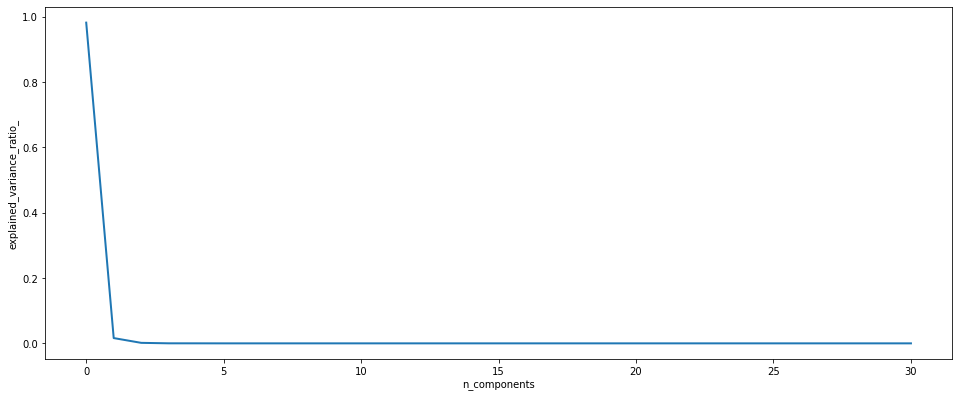

In [199]:
pca_model = PCA() 
pca_model.fit(data)

plt.figure(1, figsize=(18, 7))
plt.clf()
plt.axes([.2, .2, .7, .7])
plt.plot(pca_model.explained_variance_ratio_, linewidth=2)
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('explained_variance_ratio_')

We see that 2 PCA components are enough to explain maximum variance in the dataset.

Text(0.5, 1.0, 'PCA: p1 vs p2')

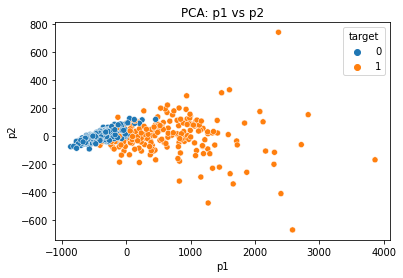

In [200]:
pca = PCA(n_components = 2)
feature= data.iloc[:,1:]
pca.fit(feature)
X_reduced_pca = pca.transform(feature)
pca_data = pd.DataFrame(X_reduced_pca, columns = ["p1","p2"])
pca_data["target"] = Y
sns.scatterplot(x = "p1", y = "p2", hue = "target", data = pca_data)
plt.title("PCA: p1 vs p2")

In [201]:
pca = PCA(n_components = 2)
X = pca.fit_transform(data.iloc[:,1:])
pca.explained_variance_ratio_.sum()

0.9982211613741723

99.8221 % of the variance in the data is explained by the first 2 components of PCA.

#**LOGISTIC REGRESSION**

In [202]:
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, Y_train)
predictions = log_reg.predict(X_test_scaled)
score = accuracy_score(Y_test, predictions)
print("Accuracy Score:", score)

Accuracy Score: 0.8531468531468531


Logistic regression predicts the type of cancer correctly 83.916% of the time.

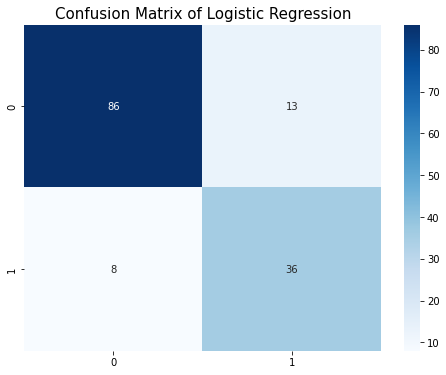

In [203]:
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(Y_test, predictions), annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix of Logistic Regression", size=15)
plt.show()

#**RANDOM FOREST**

In [204]:
rfc = RandomForestClassifier()
rfc.fit(X_train_scaled, Y_train)
predictions = rfc.predict(X_test_scaled)
score = accuracy_score(Y_test, predictions)
print("Accuracy Score:", score)

Accuracy Score: 0.7902097902097902


Random Forest predicts the type of cancer correctly for 76.923% of the time.

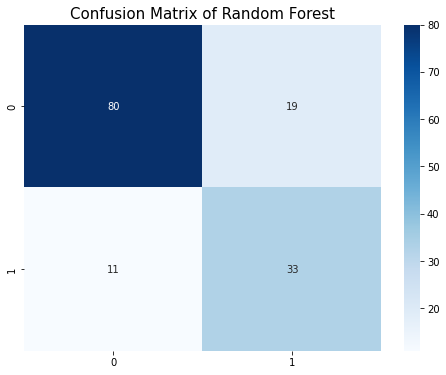

In [205]:
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(Y_test, predictions), annot=True, cmap="Blues", fmt='d')
plt.title("Confusion Matrix of Random Forest", size=15)
plt.show()

#**COMPARING MODELS**

In [206]:
logreg_pipe = Pipeline([('model', log_reg)])
rfc_pipe = Pipeline([('model', rfc)])

for model in [logreg_pipe, rfc_pipe]:
    model.fit(x_train, Y_train)

accuracy = [accuracy_score(Y_test, logreg_pipe.predict(x_test)), accuracy_score(Y_test, rfc_pipe.predict(x_test))]
recall = [recall_score(Y_test, logreg_pipe.predict(x_test)), recall_score(Y_test, rfc_pipe.predict(x_test))]
precision = [precision_score(Y_test, logreg_pipe.predict(x_test)), precision_score(Y_test, rfc_pipe.predict(x_test))]
f1 = [f1_score(Y_test, logreg_pipe.predict(x_test)), f1_score(Y_test, rfc_pipe.predict(x_test))]

model_name = ['Logistic Regression', 'Random Forest']
model_summary = pd.DataFrame({'model' : model_name, 'accuracy score': accuracy, 'recall score': recall, 'precision score': precision, 'f1 score': f1})
model_summary

,model,accuracy score,recall score,precision score,f1 score
0,Logistic Regression,0.860140,0.818182,0.750000,0.782609
1,Random Forest,0.783217,0.795455,0.614035,0.693069


From the table we see that Logistic Regression overpowers Random forest in every evaluation metrics except recall score. That is, the number of times random forest predicts the benign cancer correctly is more number of times Logistic regression does the same. 

But predicting malignant cancer incorrectly (the model predicted benign cancer when it actually was malignant in nature) can cause more harm than predicting benign cancer incorrectly (the model predicted malignant cancer when it was benign).

This is the reason we focus more on precision metrics more than the recall as it minimises false positives in the model, which of importance in our case.

F1 score is the combination of precision and recall (harmonic mean). So considering the two metrices, precison and f1 score, we infer that Logistic Regression fits the dataset accurately.